In [73]:
import pandas as pd
import h3
from shapely.geometry import Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# displays figures directly inline in the Jupyter notebook
%matplotlib inline

In [74]:
# Print working directory (where files are saved)
import os
print(os.getcwd()) # outputs where script is currently running and where files will be saved

/Users/ava/Desktop/Code/Uber_Internship_2025/Week_2


In [75]:
gdf = gpd.read_file("h3_cells.geojson")  
# How many rows? Print
print("Rows in dataset:", len(gdf))

# Randomly mark 20% of H3 cells as treated
np.random.seed(50)  # Fill in seed
random_values = np.random.rand(len(gdf))
gdf['treated'] = random_values < 0.2  # sets treated column (out of all cells, 20% will be randomly chosen to be treated)

# How many treated? Print
print("Treated cells:", gdf['treated'].sum())

# Increase price by 10% in treated cells
gdf['price_mean_new'] = gdf['price_mean']  # new price column
gdf.loc[gdf['treated'], 'price_mean_new'] = gdf.loc[gdf['treated'], 'price_mean_new'] * 1.10
# for all rows where gdf treated is True, increase the value in the price_mean column by 10%. 

Rows in dataset: 113
Treated cells: 15


In [76]:
# Simulate trips: elasticity = -0.4, price ↑10%
gdf['trips_simulated'] = gdf['trips_sum'] # new column to simulate trips
decrease_factor = 1 + (-0.4) * 0.10 # elasticity times price change 
gdf.loc[gdf['treated'], 'trips_simulated'] = gdf.loc[gdf['treated'], 'trips_sum'] * decrease_factor
# for all rows where gdf treated is True, change the value of trips based on the elasticity of -0.4 and
# price increase of 10%. 

# Compute trips change percent. Store it in the dataframe.
gdf['trips_change_pct'] = (gdf['trips_simulated'] - gdf['trips_sum']) / gdf['trips_sum']

/var/folders/w3/f3zhp9t17_7cxs5hc0t1bznw0000gn/T/ipykernel_39292/783327045.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[  1.92 195.84 216.96  46.08 131.52 117.12  54.72 170.88 148.8  148.8
 138.24 178.56 154.56 157.44 132.48]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  gdf.loc[gdf['treated'], 'trips_simulated'] = gdf.loc[gdf['treated'], 'trips_sum'] * decrease_factor


In [77]:
# Estimate elasticity only for treated cells
gdf['elasticity_estimate'] = np.nan  # initialize elasticity_estimate column
price_change_pct = 0.10 # 10% price increase
gdf.loc[gdf['treated'], 'elasticity_estimate'] = (gdf.loc[gdf['treated'], 'trips_change_pct'] / price_change_pct)
# for all rows where gdf treated is True, compute the estimated elasticity of demand by dividing 
# the price change % from the trips change %. 

# Compute summary stats: mean, min, max elasticity
elasticity_mean = gdf.loc[gdf['treated'], 'elasticity_estimate'].mean()
elasticity_min = gdf.loc[gdf['treated'], 'elasticity_estimate'].min()
elasticity_max = gdf.loc[gdf['treated'], 'elasticity_estimate'].max()

print(f"Elasticity mean: {elasticity_mean:.2f}, min: {elasticity_min:.2f}, max: {elasticity_max:.2f}")

# No variation in mean, min, and max because we applied a fixed 10% price increase to all treated cells and 
# assumed a constant elasticity of -0.4 for how trips change to price. 
# All treated cells saw exactly a 4% drop in trips. 

Elasticity mean: -0.40, min: -0.40, max: -0.40


✅ Saved: /Users/ava/Desktop/Code/Uber_Internship_2025/Week_2/elasticity_simulation.csv


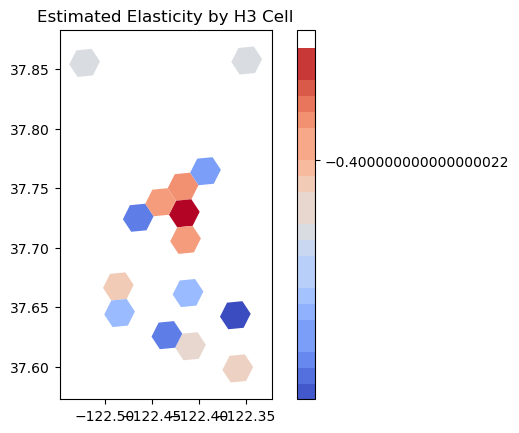

In [78]:
# Save new GeoJSON
output_path = os.path.join(os.getcwd(), "elasticity_simulation.csv")
gdf.to_csv(output_path, index=False)
print("✅ Saved:", output_path)

# Plot elasticity on map
gdf.plot(
    column='elasticity_estimate',
    cmap='coolwarm',
    legend= True
)
plt.title("Estimated Elasticity by H3 Cell")
plt.show()